In [1]:
# libraries and functions
import sys
sys.path.append("../functions")
from import_auxiliary import import_data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize


# global variables
n_comp = 14                                                                                 # number of compartments
age_groups = ['0-4', '5-17', '18-29', '30-39', '40-49', '50-59', '60+']                     # list of strings with age groups 
age_groups_bins = [0, 5, 18, 30, 40, 50, 60, np.inf]                                        # list of int with age groups extremes 
n_age = len(age_groups)                                                                     # number of age groups
n_sev = 5                                                                                   # number of perceived severity groups

# path
path_CM_red = "../data/compliant_matrix.json"
path_CM_yellow = "../data/non_compliant_matrix.json"
path_Nij = "../data/Nij.json"

In [2]:
# import data
Italy_dict = import_data(path_CM_red, path_CM_yellow, path_Nij)

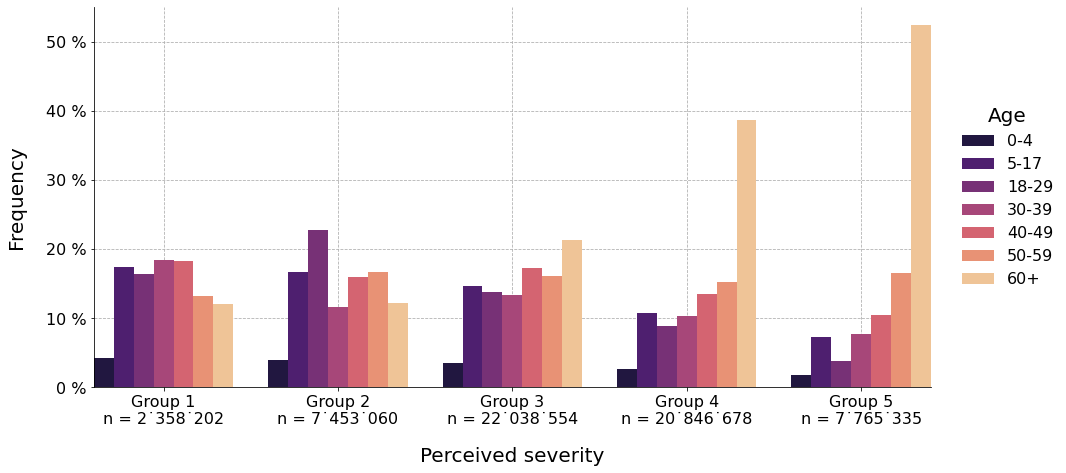

In [3]:
# Distribution of age in perceived severity groups

ps_groups = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

Nij_norm = normalize(Italy_dict['Nij'], axis=0, norm='l1')
df_Nij_norm = pd.DataFrame(Nij_norm.T, columns = age_groups, index = ps_groups).reset_index().melt(id_vars='index')
df_Nij_norm.rename(columns={'index': 'Perceived severity', 'variable': 'Age', 'value': 'Frequency'}, inplace=True)
df_Nij_norm['Frequency'] = df_Nij_norm['Frequency']*100

Nper = Italy_dict['Nij'].sum(axis = 0)

x_labels = [ps_groups[i] + '\nn = ' + '{:,}'.format(round(Nper[i])).replace(',', '\u02D9') for i in range(len(Nper))]

fig, ax = plt.subplots(figsize=(15,7))

pal = sns.color_palette("magma", n_age)

sns.barplot(ax = ax, data = df_Nij_norm, x = 'Perceived severity', y = 'Frequency', hue = 'Age', palette = pal, linewidth=1.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.margins(x=0, tight=True)
ax.grid(linestyle='--')
ax.set_axisbelow(True)

ax.xaxis.set_ticks([0, 1, 2, 3, 4], labels = x_labels)
ax.yaxis.set_ticks([0, 10, 20, 30, 40, 50], labels = ['0 %', '10 %', '20 %', '30 %', '40 %', '50 %'])
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20

ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False, fontsize = 16, title = 'Age', title_fontsize = 20)

plt.show()

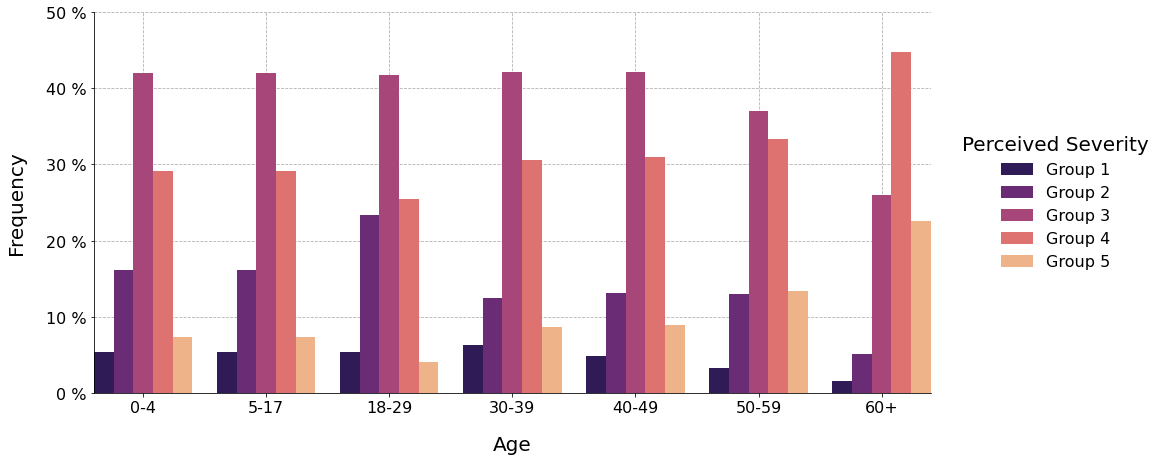

In [4]:
# Distribution of perceived severity in age groups

ps_groups = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

Nij_norm = normalize(Italy_dict['Nij'], axis=1, norm='l1')
df_Nij_norm = pd.DataFrame(Nij_norm, columns = ps_groups, index = age_groups).reset_index().melt(id_vars='index')
df_Nij_norm.rename(columns={'index': 'Age', 'variable': 'Perceived severity', 'value': 'Frequency'}, inplace=True)
df_Nij_norm['Frequency'] = df_Nij_norm['Frequency']*100

Nage = Italy_dict['Nij'].sum(axis = 1)

#x_labels = [age_groups[i] + '\nn = ' + '{:,}'.format(round(Nage[i])).replace(',', '\u02D9') for i in range(len(Nage))]

fig, ax = plt.subplots(figsize=(15,7))

pal = sns.color_palette("magma", n_sev)

sns.barplot(ax = ax, data = df_Nij_norm, x = 'Age', y = 'Frequency', hue = 'Perceived severity', palette = pal, linewidth=1.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.margins(x=0, tight=True)
ax.grid(linestyle='--')
ax.set_axisbelow(True)

ax.xaxis.set_ticks([0, 1, 2, 3, 4, 5, 6], labels = age_groups)
ax.yaxis.set_ticks([0, 10, 20, 30, 40, 50], labels = ['0 %', '10 %', '20 %', '30 %', '40 %', '50 %'])
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20

ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False, fontsize = 16, title = 'Perceived Severity', title_fontsize = 20)

plt.show()